In [4]:
import pandas as pd
data=pd.read_csv("C:\\Users\\laksh\\OneDrive\\Documents\\bank loan project\\cleaned_loan.csv")
df=pd.DataFrame(data)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,sno,income_bin
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,1,poor
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EXP,55-64,to_inst,NaN,North,direct,1,NaN,2,poor
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,3,middle class
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,4,rich
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,5,rich


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,sno
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932,74335.500000
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435,42917.476598
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,1.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000,37168.250000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000,74335.500000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000,111502.750000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,148670.000000


In [7]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
df["loan_limit"]=df["loan_limit"].fillna(df["loan_limit"].mode()[0],inplace=False)

In [9]:
import numpy as np
gender_map = {
    "Sex Not Available": "Unknown", "MALE": "Male", "m": "Male",
    "F": "Female", "FEMALE": "Female","Joint":"Male"
}
df["Gender"] = df["Gender"].replace(gender_map)
df["Gender"] = df["Gender"].replace(["unknown", None], np.nan)

In [10]:
df["approv_in_adv"]=df["approv_in_adv"].fillna(df["approv_in_adv"].mode()[0],inplace=False)

In [11]:
df["loan_purpose"]=df["loan_purpose"].fillna(df["loan_purpose"].mode()[0],inplace=False)

In [12]:
df["rate_of_interest"]=df["rate_of_interest"].fillna(df["rate_of_interest"].mode()[0],inplace=False)
df["Interest_rate_spread"]=df["Interest_rate_spread"].fillna(df["Interest_rate_spread"].mode()[0],inplace=False)
df["Upfront_charges"]=df["Upfront_charges"].fillna(df["Upfront_charges"].mean(),inplace=False)

In [13]:
df["term"]=df["term"].fillna(df["term"].mode()[0],inplace=False)

In [14]:
df["Neg_ammortization"]=df["Neg_ammortization"].fillna(df["Neg_ammortization"].mode()[0],inplace=False)

In [15]:
df["property_value"]=df[
"property_value"].fillna(df["property_value"].mode()[0],inplace=False)

In [16]:
df["income"]=df["income"].fillna(df["income"].mean(),inplace=False)

In [17]:
df["age"]=df["age"].fillna(df["age"].mode()[0],inplace=False)

In [18]:
df["submission_of_application"]=df["submission_of_application"].fillna(df["submission_of_application"].mode()[0],inplace=False)

In [19]:
df["LTV"]=df["LTV"].fillna(df["LTV"].mean(),inplace=False)

In [20]:
df["dtir1"]=df["dtir1"].fillna(df["dtir1"].mean(),inplace=False)

In [21]:
paid_map = {
    0: "not paid", 1: "paid"
}
df["default_rate"] = df["Status"].replace(paid_map)

In [22]:
df['Neg_ammortization'] = df['Neg_ammortization'].map({
    'neg_amm': 'Negative Amortization',
    'not_neg': 'No Negative Amortization'
})

df['lump_sum_payment'] = df['lump_sum_payment'].map({
    'lpsm': 'Lump Sum Paid',
    'not_lpsm': 'No Lump Sum'
})

In [23]:
temp_int = df["income"].fillna(df["income"].mean())
df["income_bin"] = pd.cut(temp_int, bins=[0,5000,10000,15000,20000,578580], labels=["poor","middle class","rich","very rich","very veryrich"])
bin_means = df.groupby("income_bin")["income"].mean()
def fill_with_bin_mean(row):
    if pd.isna(row["income"]):
        bin_name = row["income_bin"]
        return bin_means[bin_name]
    else:
        return row["income"]

df["income_filled"] = df.apply(fill_with_bin_mean, axis=1)

print("\nFinal Output:\n", df)
df["income_bin"]=df["income_bin"].fillna(df["income_bin"].mode()[0],inplace=False)

C:\Users\laksh\AppData\Local\Temp\ipykernel_748\459435157.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby("income_bin")["income"].mean()



Final Output:
             ID  year loan_limit   Gender approv_in_adv loan_type loan_purpose  \
0        24890  2019         cf  Unknown         nopre     type1           p1   
1        24891  2019         cf     Male         nopre     type2           p1   
2        24892  2019         cf     Male           pre     type1           p1   
3        24893  2019         cf     Male         nopre     type1           p4   
4        24894  2019         cf     Male           pre     type1           p1   
...        ...   ...        ...      ...           ...       ...          ...   
148665  173555  2019         cf  Unknown         nopre     type1           p3   
148666  173556  2019         cf     Male         nopre     type1           p1   
148667  173557  2019         cf     Male         nopre     type1           p4   
148668  173558  2019         cf   Female         nopre     type1           p4   
148669  173559  2019         cf   Female         nopre     type1           p3   

       Cred

In [25]:
df["sno"]=range(1,len(data)+1)
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,submission_of_application,LTV,Region,Security_Type,Status,dtir1,sno,income_bin,default_rate,income_filled
148665,173555,2019,cf,Unknown,nopre,type1,p3,l1,nopc,nob/c,...,to_inst,71.792763,south,direct,0,48.0,148666,middle class,not paid,7860.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,not_inst,74.428934,south,direct,0,15.0,148667,middle class,not paid,7140.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,not_inst,61.332418,North,direct,0,49.0,148668,middle class,not paid,6900.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,to_inst,70.683453,North,direct,0,29.0,148669,middle class,not paid,7140.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,not_inst,72.849462,North,direct,0,44.0,148670,middle class,not paid,7260.0


In [26]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [27]:
df.to_csv("cleaned_loan1.csv", index=False)
print("File saved successfully!")

File saved successfully!


In [28]:
neg_counts = df['Neg_ammortization'].value_counts()
print(neg_counts)

Neg_ammortization
No Negative Amortization    133541
Negative Amortization        15129
Name: count, dtype: int64


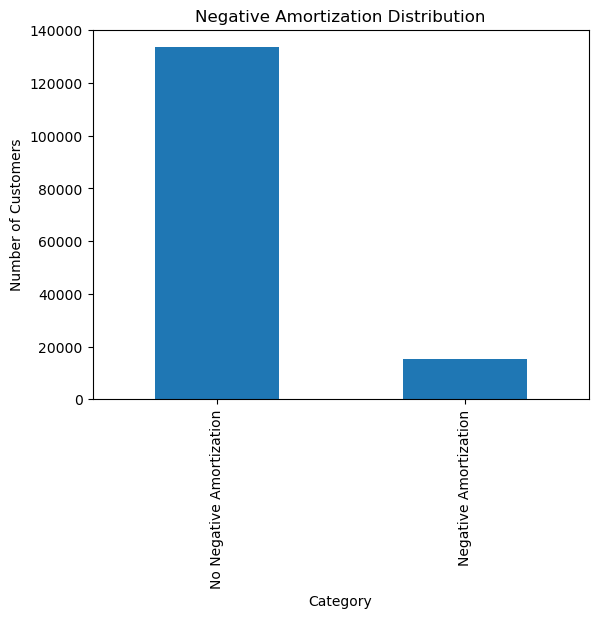

In [29]:
import matplotlib.pyplot as plt
neg_counts.plot(kind='bar')
plt.title("Negative Amortization Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Customers")
plt.show()

In [30]:
lump_counts = df['lump_sum_payment'].value_counts()
print(lump_counts)

lump_sum_payment
No Lump Sum      145286
Lump Sum Paid      3384
Name: count, dtype: int64


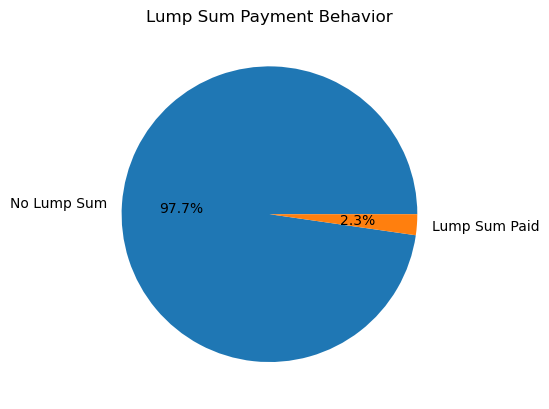

In [31]:
lump_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Lump Sum Payment Behavior")
plt.ylabel("")
plt.show()

In [32]:
risk_analysis = pd.crosstab(
    df['Neg_ammortization'],
    df['lump_sum_payment']
)

risk_analysis

lump_sum_payment,Lump Sum Paid,No Lump Sum
Neg_ammortization,,
Negative Amortization,0,15129
No Negative Amortization,3384,130157


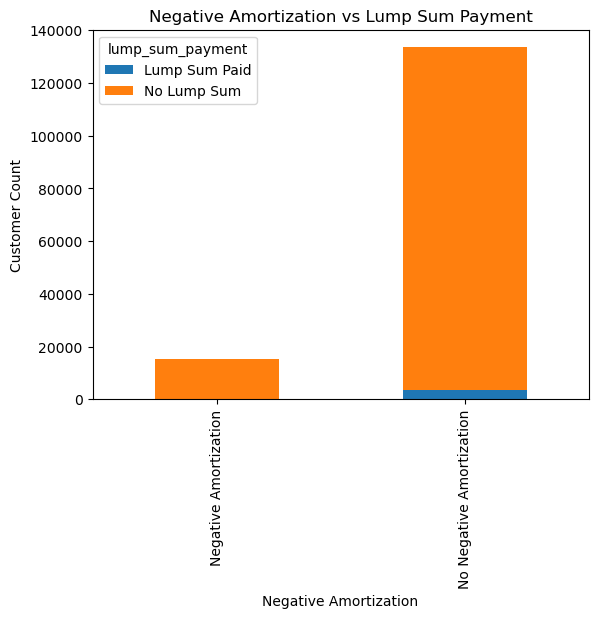

In [33]:
risk_analysis.plot(kind='bar', stacked=True)
plt.title("Negative Amortization vs Lump Sum Payment")
plt.xlabel("Negative Amortization")
plt.ylabel("Customer Count")
plt.show()

In [34]:
df['risk_flag'] = df.apply(
    lambda x: 'High Risk' if
    x['Neg_ammortization'] == 'Negative Amortization'
    and x['lump_sum_payment'] == 'No Lump Sum'
    else 'Low/Medium Risk',
    axis=1
)

df['risk_flag'].value_counts()


risk_flag
Low/Medium Risk    133541
High Risk           15129
Name: count, dtype: int64

In [35]:
risk_counts = df['risk_flag'].value_counts()
print(risk_counts)

risk_flag
Low/Medium Risk    133541
High Risk           15129
Name: count, dtype: int64


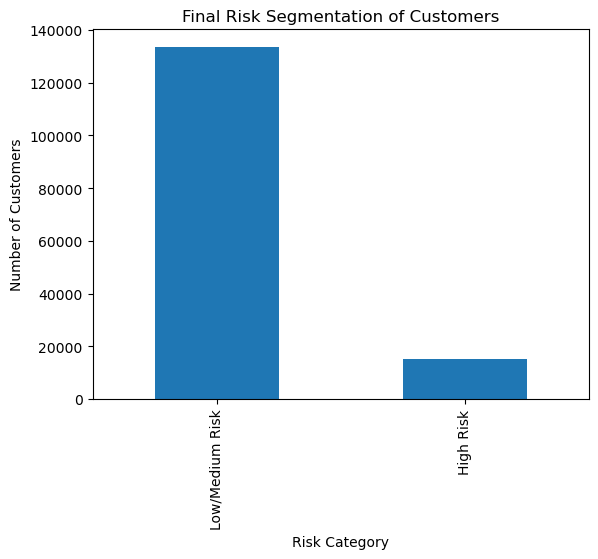

In [36]:
import matplotlib.pyplot as plt

plt.figure()
risk_counts.plot(kind='bar')
plt.title("Final Risk Segmentation of Customers")
plt.xlabel("Risk Category")
plt.ylabel("Number of Customers")
plt.show()


In [37]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    df['Neg_ammortization'],
    df['lump_sum_payment']
)

contingency_table

# Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Value:", chi2)
print("P-Value:", p_value)

if p_value< 0.05:
    print("Statistically significant relationship exists")
else:
    print("No significant relationship")

Chi-Square Value: 391.16812670655105
P-Value: 4.608670154447222e-87
Statistically significant relationship exists


In [38]:
# Cramér’s V shows a moderate to strong relationship between amortization behavior and lump sum payments.
import numpy as np

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(cramers_v)

if cramers_v < 0.10:
    print("very weak relationship")
elif cramers_v>0.10 and cramers_v<0.30:
    print("weak relationship")
elif cramers_v>0.30 and cramers_v<0.50:
    print("moderate relationship")
else:
    print("strong relationship")

0.05129441242990867
very weak relationship


In [39]:
#What % of customers are High Risk?
risk_proportion = df['risk_flag'].value_counts(normalize=True) * 100
print(risk_proportion)

risk_flag
Low/Medium Risk    89.823771
High Risk          10.176229
Name: proportion, dtype: float64


In [40]:
#Confidence Interval for High-Risk Rate (VERY STRONG)

from statsmodels.stats.proportion import proportion_confint

high_risk_count = (df['risk_flag'] == 'High Risk').sum()
total_customers = len(df)

ci_low, ci_high = proportion_confint(
    high_risk_count,
    total_customers,
    alpha=0.05,
    method='wilson'
)

print("95% CI:", ci_low*100, "-", ci_high*100)


95% CI: 10.023573862144044 - 10.330942549004547


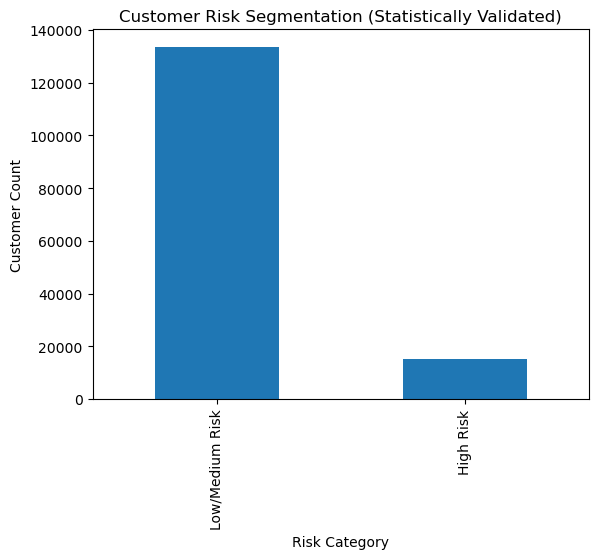

In [41]:
import matplotlib.pyplot as plt

risk_counts = df['risk_flag'].value_counts()

plt.figure()
risk_counts.plot(kind='bar')
plt.title("Customer Risk Segmentation (Statistically Validated)")
plt.xlabel("Risk Category")
plt.ylabel("Customer Count")
plt.show()


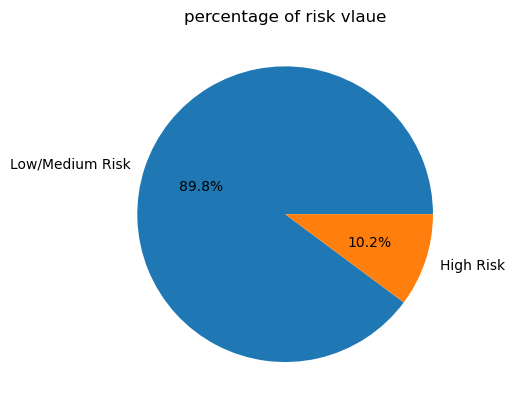

In [42]:
risk_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("percentage of risk vlaue")
plt.ylabel("")
plt.show()